# Question 1a: %timeit
You may know from your experiences with matlab that you should always prefer vector- or matrix-based operations over for loops, if possible (hence the name **mat**(rix)**lab**(oratory)). The same is true of python -- you should prefer numpy-array-based operations over for loops. This will also be important for tensorflow -- as much as possible, you should avoid using python for loops when writing tensorflow code. To examine the impact of using for loops over numpy-array-based operations, for this question, you will exploit one of jupyter's built-in magic commands, `%timeit`:

### Note:  
In case of any submission uploading issues, I also attached the print-out version of this notebook at the end of my Homework 1 writting part. Thanks very much for your understanding.  
Libo Zhang (lz200)

In [1]:
import numpy as np
%timeit np.zeros((100,100))  
# provide statistics on how long it takes to generate a 100x100 array of 0s

1.59 µs ± 81.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


As you can see, all you need to do is put `%timeit` before the command that you would normally run and jupyter will run that line multiple times to generate computation timing statistics.

Now, let's compare the computation timing for multiplying two random matrices, each with a dimension of 100x100, using 1) `np.matmul` and 2) multiple embedded for loops. For (2), please write your own function to implement the for loops. Feel free to wrap (2) into a function definition. Verify that (1) and (2) produce the same output. According to `%timeit`, how many times faster is (1) than (2)?

In [2]:
# your code here
# Generate two random matrices,
# each with a dimension of 100 * 100.
A = np.random.randint(low = 1, high = 5, size = (100, 100))
B = np.random.randint(low = 1, high = 5, size = (100, 100))

In [3]:
# Write my own function to implement the for loops.
def multiple_forloops (A, B, C) :
    for i in range(A.shape[0]) :
        for j in range(A.shape[0]) :
            for k in range(A.shape[0]) :
                C[i, j] = C[i, j] + A[i, k] * B[k, j]
    return C

In [4]:
# (1) Use np.matmul
X = np.matmul(A, B)

# (2) Use multiple embedded for loops
C = np.zeros((100, 100))
Y = multiple_forloops(A, B, C)

In [5]:
# Use np.allclose to verify that (1) and (2) produce the same output.
print(np.allclose(X, Y))

True


In [6]:
%timeit np.matmul(A, B)

1.06 ms ± 51.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
C = np.zeros((100, 100))

In [8]:
%timeit multiple_forloops(A, B, C)

522 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Question 1a Answer: 
According to %timeit, we can see that (1) is approximately 520 times faster than (2).

# Question 1b
There are two main ways of computing convolutions digitally: 1) directly, using the definition of a convolution, and 2) using the convolution theorem that you proved in the written portion of this homework assignment (i.e., using ffts). Which method is more efficient depends on the sizes of the inputs. Let's use `%timeit` to compare the speeds for 1D convolutions using [`scipy.signal.convolve `](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). This function has an argument called "method", which can be set to "direct" or "fft", which correspond to (1) and (2) above. Use this function to convolve two random 1D signals of lengths $n=100, 500, 1000,$ and $2000$, and compare the speed of both methods. For which n do(es) method 1 outperform method 2, and vice versa? Can you make any generalizations based on these results about when one method outperforms the other?

In [9]:
from scipy.signal import convolve
# your code here; feel free to use multiple cells
# n = 100
A1 = np.random.randint(low = 1, size = 100)
B1 = np.random.randint(low = 1, size = 100)
# n = 500
A2 = np.random.randint(low = 1, size = 500)
B2 = np.random.randint(low = 1, size = 500)
# n = 1000
A3 = np.random.randint(low = 1, size = 1000)
B3 = np.random.randint(low = 1, size = 1000)
# n = 2000
A4 = np.random.randint(low = 1, size = 2000)
B4 = np.random.randint(low = 1, size = 2000)

In [10]:
# (1) n = 100
%timeit convolve(A1, B1, method = "direct")

7.73 µs ± 388 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
# (2) n = 100
%timeit convolve(A1, B1, method = "fft")

63.4 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
# (1) n = 500
%timeit convolve(A2, B2, method = "direct")

100 µs ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
# (2) n = 500
%timeit convolve(A2, B2, method = "fft")

89 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
# (1) n = 1000
%timeit convolve(A3, B3, method = "direct")

382 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
# (2) n = 1000
%timeit convolve(A3, B3, method = "fft")

108 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
# (1) n = 2000
%timeit convolve(A4, B4, method = "direct")

1.55 ms ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
# (2) n = 2000
%timeit convolve(A4, B4, method = "fft")

156 µs ± 5.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Question 1b Answer: 
According to the above results, we can see that  
When n = 100, method (1) clearly outperforms method (2).  
When n = 500, method (2) slightly outperforms method (1).  
When n = 1000 and n = 2000, method (2) clearly outperforms method (1).  
To generalize  
When the 1D input signal size is relatively small (n < 500), method (1) outperforms method (2).  
When the 1D input signal size is relatively large (n >= 500), method (2) outperforms method (1).

# Question 2: the convolution theorem
As we investigated in question 1b, it is also possible to do convolutions using Fourier transforms, and in some cases this is the preferable method. In fact, there is some body of work investigating the use of ffts and multiplication to do convolution operations in convolutional neural networks. 

For this question, to illustrate this theorem, given a convolutional kernel you will find the corresponding Fourier operation that produces the same result. To this end,

1. create a 7x7 Gaussian kernel with a standard deviation $\sigma=2$ (using a pixel grid spacing of 1)
2. load an image, if it is color then convert it to grayscale (you can just sum the 3 color channels), and then resize the image into a 128x128 array
3. compute the convolution  - you can use a numpy (np) or scipy function. Make sure the output is the same size as the input image, which is slightly different than the formal definition of a discrete convolution, but is something that is usually convenient to do.
4. Find the Fourier filter that does the same operation in the Fourier domain, and show the resulting blurred image implemented using the Fourier method (i.e., if $I_{2}=I_{1}*h$, then $\mathcal{F}[I_{2}]=\mathcal{F}[I_{1}]\mathcal{F}[h]$, so find the correct array for $\mathcal{F}[h]$ and re-generate $I_2$). 

In [18]:
from scipy import signal
import matplotlib.pyplot as plt
# the following line will cause subsequent plotting commands 
# to display directly in the notebook
%matplotlib inline

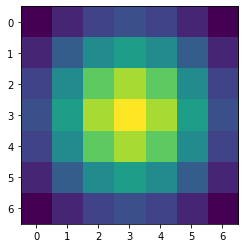

In [19]:
# (1) Create a 7 * 7 Gaussian kernel with a standard deviation sigma = 2.
def gaussian_kernel (imsize = 7, sigma = 2) :
    gk = signal.gaussian(M = imsize, std = sigma)
    gk = gk.reshape(imsize, 1)
    gaussian_kernel = np.outer(gk, gk)
    return gaussian_kernel
test_kernel = gaussian_kernel()
plt.imshow(test_kernel, interpolation = "none")

In [20]:
import cv2

<class 'numpy.ndarray'>
(1400, 1400, 3)


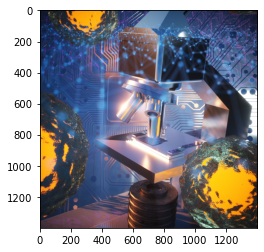

In [21]:
# (2) Load an image
image = cv2.imread("image.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(type(image))
print(image.shape)
plt.imshow(image)

<class 'numpy.ndarray'>
(1400, 1400)


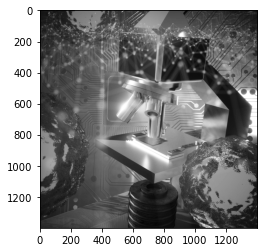

In [22]:
# (2) Convert it to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(type(gray_image))
print(gray_image.shape)
plt.imshow(gray_image, cmap = "gray")

<class 'numpy.ndarray'>
(128, 128)


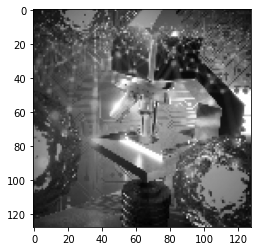

In [23]:
# (2) Resize the image into a 128 * 128 array
I1 = cv2.resize(gray_image, (128, 128))
print(type(I1))
print(I1.shape)
plt.imshow(I1, cmap = "gray")

In [24]:
from scipy.signal import convolve2d

<class 'numpy.ndarray'>
(128, 128)


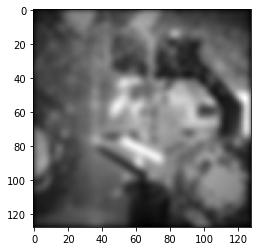

In [25]:
# (3) Compute the convolution I2 = I1 * h
# Use mode = "same" to make sure that
# the output is the same size as the input image.
h = gaussian_kernel()
I2 = convolve2d(I1, h, mode = "same")
print(type(I2))
print(I2.shape)
plt.imshow(I2, cmap = "gray")

In [26]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

In [27]:
# (4) Find the Fourier filter that does the same operation
F_I1 = fft2(I1)
F_h = fft2(h, s = I1.shape)
# In frequency domain, F[I2] = F[I1]F[h]
F_I2 = F_I1 * F_h
inverseF_I2 = np.real(ifft2(F_I2))
print("The shape of the Fourier filter (F[h]) is: ")
print(F_h.shape)

The shape of the Fourier filter (F[h]) is: 
(128, 128)


In [28]:
print("The Fourier filter (the correct array for F[h]) should be: ")
print(" ")
print(F_h)

The Fourier filter (the correct array for F[h]) should be: 
 
[[21.41246112+0.00000000e+00j 21.1120674 -3.13167937e+00j
  20.22579563-6.13542803e+00j ... 18.79745083+8.89053212e+00j
  20.22579563+6.13542803e+00j 21.1120674 +3.13167937e+00j]
 [21.1120674 -3.13167937e+00j 20.35786414-6.17549057e+00j
  19.04471256-9.00747821e+00j ... 19.83402761+6.01658650e+00j
  20.83938654+3.09123098e+00j 21.27391163+7.21644966e-16j]
 [20.22579563-6.13542803e+00j 19.04471256-9.00747821e+00j
  17.34687712-1.15908127e+01j ... 20.30315976+3.01168925e+00j
  20.86291172+9.99200722e-16j 20.83938654-3.09123098e+00j]
 ...
 [18.79745083+8.89053212e+00j 19.83402761+6.01658650e+00j
  20.30315976+3.01168925e+00j ... 12.81041889+1.56095406e+01j
  15.20825547+1.37839593e+01j 17.23345817+1.15150286e+01j]
 [20.22579563+6.13542803e+00j 20.83938654+3.09123098e+00j
  20.86291172+4.44089210e-16j ... 15.20825547+1.37839593e+01j
  17.34687712+1.15908127e+01j 19.04471256+9.00747821e+00j]
 [21.1120674 +3.13167937e+00j 21.27391

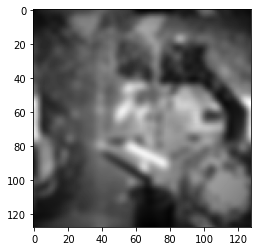

In [29]:
# (4) Show the resulting blurred image implemented using the Fourier method
plt.imshow(inverseF_I2, cmap = "gray")

(-0.5, 127.5, 127.5, -0.5)

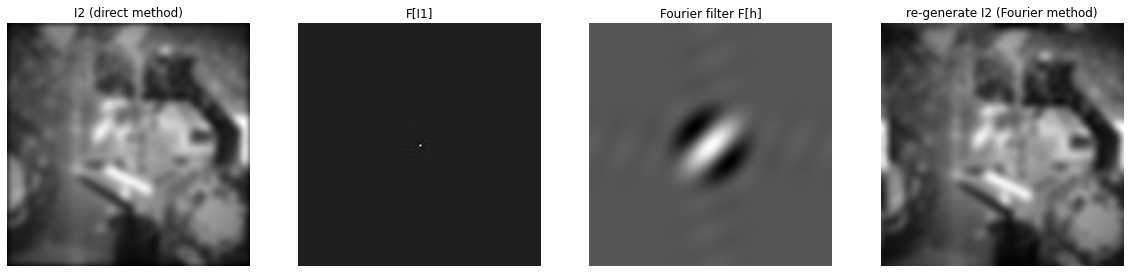

In [30]:
# (4) Plot I2, F[I1], F[h], and the re-generated I2 using Fourier method

plt.figure(figsize = (20, 10))

plt.subplot(1,4,1), plt.imshow(I2, "gray"), plt.title("I2 (direct method)")
plt.axis("off")

plt.subplot(1,4,2), plt.imshow(np.real(fftshift(F_I1)), "gray"), plt.title("F[I1]")
plt.axis("off")

plt.subplot(1,4,3), plt.imshow(np.real(fftshift(F_h)), "gray"), plt.title("Fourier filter F[h]")
plt.axis("off")

plt.subplot(1,4,4), plt.imshow(inverseF_I2, "gray"), plt.title("re-generate I2 (Fourier method)")
plt.axis("off")

### Question 2 Answer:  
According to the above results, we can see that the blurred image I2 using direct convolution method and the re-generated blurred image I2 using the Fourier method are identical.

# Question 3: data augmentation
One indispensable tool used in deep learning is data augmentation. That is, we can to some extent artificially increase the size of our dataset by randomly altering the current dataset. One common augmenting operation is to do random crops of the original image. For example, researchers designing neural networks for ImageNet, a dataset of natural RGB images, typically resize the images to 256x256x3 and then take a random 224x224x3 crop such that the latter fits entirely in the former. What this means is that the 224x224 crop window must be completely contained within the original 256x256 image.

For this question, take a picture with your phone or find a picture online, load it into jupyter, resize it to 256x256x3 (discard the alpha channel if one is present), and then perform the random 224x224x3 crop. The crops should be uniformly distributed within the bounding 256x256 box and do not need to be rotated. Please display the 256x256x3 image and 5 random crops using `plt.imshow`.

The shape of the original image is: 
(1400, 1400, 3)
The shape of the resized image is: 
(256, 256, 3)
 
Plot the resized image below


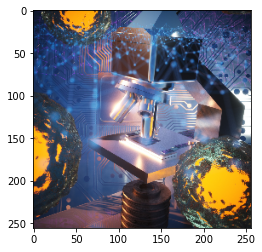

In [31]:
# import numpy as np
# import matplotlib.pyplot as plt
# your code here; feel free to use multiple cells
# Note: I will use the same original image as that in Question 2

# Load the image into jupyter
image = cv2.imread("image.JPG")
good_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Resize the image to 256 * 256 * 3
im256 = cv2.resize(good_image, (256, 256))
# Check if the resize operation is successful
print("The shape of the original image is: ")
print(good_image.shape)
print("The shape of the resized image is: ")
print(im256.shape)
print(" ")
print("Plot the resized image below")
plt.imshow(im256)

In [32]:
# Define a function for random crop
def RandomCrop (image, size = 224) :
    height = image.shape[0]
    width  = image.shape[1]
    # Take a random 224 * 224 * 3 crop
    # The crops are uniformly distributed within the bounding 256 * 256 box
    height_crop = np.random.randint(low = 0, high = height - size)
    width_crop  = np.random.randint(low = 0, high = width - size)
    cropped_image = image[height_crop:height_crop + size, width_crop: width_crop + size, :]
    # Return the randomly 224 * 224 * 3 cropped image 
    return cropped_image

In [33]:
# Perform the random 224 * 224 * 3 crop for 5 times
crop1 = RandomCrop(im256)
crop2 = RandomCrop(im256)
crop3 = RandomCrop(im256)
crop4 = RandomCrop(im256)
crop5 = RandomCrop(im256)
# Check the shapes of the cropped images
print(crop1.shape)
print(crop2.shape)
print(crop3.shape)
print(crop4.shape)
print(crop5.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


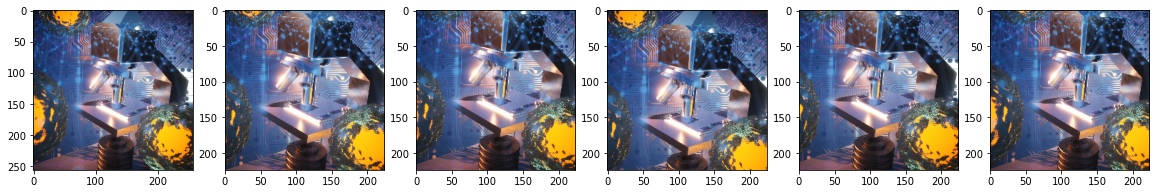

In [34]:
# Display the 256 * 256 * 3 image first (the leftmost image)
# Then display the 5 random crops
list_images = [im256, crop1, crop2, crop3, crop4, crop5]
plt.figure(figsize = (20, 10))
list_columns = 6
for i, image in enumerate(list_images) :
    plt.subplot(1, list_columns, i + 1)
    plt.imshow(image)